# Machine Learning Model On Customer Segmentation Dataset

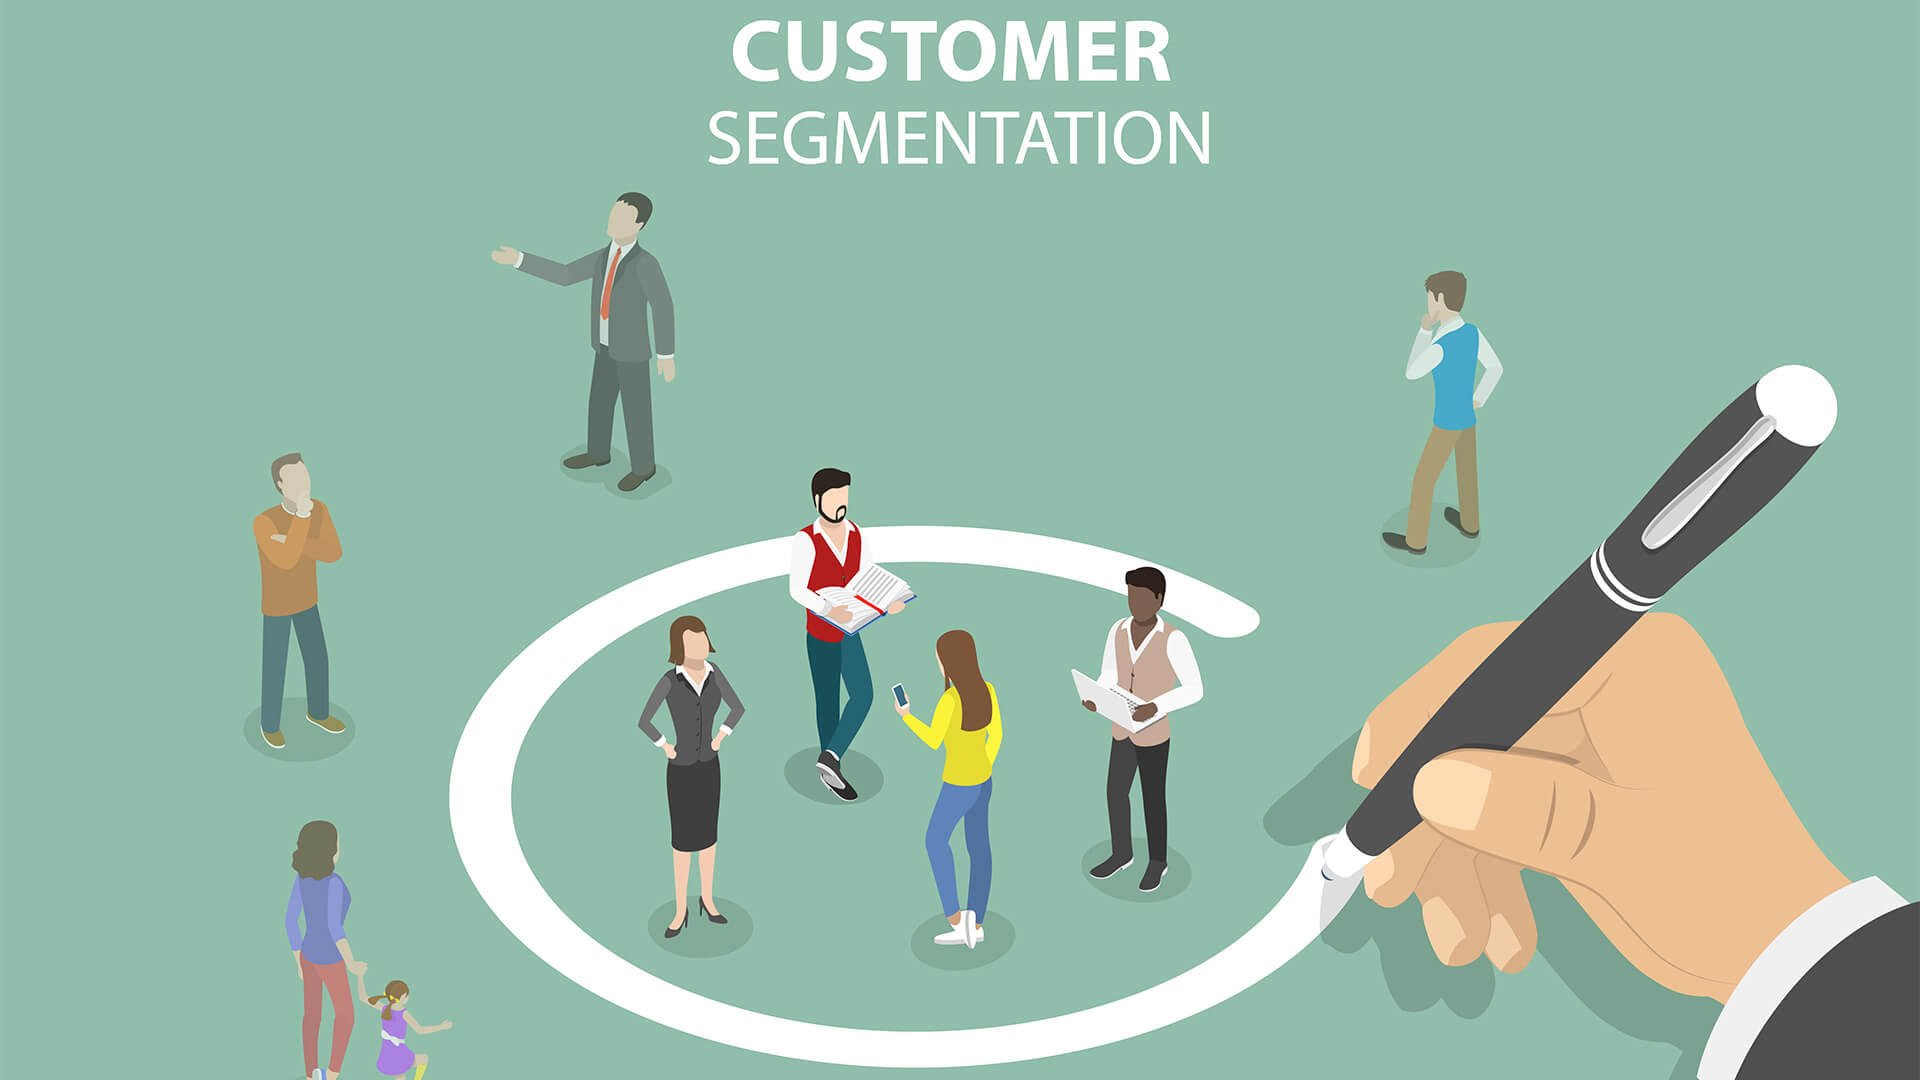

## Contents

* [Description](#Description:)<br>
* [Problem Statement](#Problem-Statement.)<br>
* [Import Libraries And Data](#Import-Libraries-And-Data)
* [Data Loading and Description](#Data-Loading-and-Description)
* [Basic Data Exploration](#Basic-Data-Exploration)
* [Data Profiling](#Profiling-Report)
* [Checking for missing values](#Checking-for-missing-values)
    - * [Checking Null Values](#Checking-Null-Values)<br/>
    - * [Null Value in percentage](#Null-Value-in-percentage)<br/>
    - * [Checking For Duplicate Values](#Checking-For-Duplicate-Values)<br/>
* * [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br/>
    - * [1. Transactions by Invoice Month](#1.-Transactions-by-Invoice-Month)<br/>
    - * [2. The Number Of Orders By Month](#2.-The-Number-Of-Orders-By-Month)<br/>
    - * [3. A Pie Chart representing Year Wise Stock](#3.-A-Pie-Chart-representing-Year-Wise-Stock)<br/>
    - * [4. Number Of Order By Country](#4.-Number-Of-Order-By-Country)<br/>
    - * [5. Total Revenue by Country](#5.-Total-Revenue-by-Country)<br/>
    - * [6. Last Invoice Date by Country](#6.-Last-Invoice-Date-by-Country)<br/>
    - * [7. Pair Plot Representing Each Feature and Relation](#7.-Pair-Plot-Representing-Each-Feature-and-Relation)<br/>
* [Feature Engineering for Model building](#Feature-Engineering-for-Model-building)<br/>
    - * [Dropping the irrelevant columns](#Dropping-the-irrelevant-columns)<br/>
    - * [Correlation Between Numerical Features Using Heatmap](#Correlation-Between-Numerical-Features-Using-Heatmap)<br/>
    - * [Convert Categorical variable into Numerical](#Convert-Categorical-variable-into-Numerical)<br/>
    - * [Scaling And Transformation](#Scaling-And-Transformation)<br/>
    - * [Taking Sample Of Data](#Taking-Sample-Of-Data)<br/>
* [Model Selection/Predict the groups](#Model-Selection/Predict-the-groups)<br/>
    - * [1. K-means Clustering](#1.-K-means-Clustering)<br/>
    - * [2. Hierarchical Clustering](#2.-Hierarchical-Clustering)<br/>
    - * [3. DBSCAN](#3.-DBSCAN)<br/>
* [Comparison of Accuracy among Different Algorithms](#Comparison-of-Accuracy-among-Different-Algorithms)<br/>
* [Conclusion](#Conclusion)<br/>  

## Description:

In this project, we will first explore the dataset using NumPy and Pandas to perform data cleaning and preprocessing tasks. We will then use Seaborn and Matplotlib to create visualizations that help us gain insights into customer behavior and preferences. The visualizations will include histograms, bar charts, and heatmaps, among others.

After exploring the data, we will use Scikit-Learn to develop a machine learning model that predicts the purchase amount based on customer demographics. We will split the dataset into training and testing sets and evaluate the performance of different algorithms, such as linear regression, decision trees, and random forests. We will then select the best algorithm and use it to make predictions on the test dataset.

Finally, we will summarize our findings and provide recommendations for retailers based on our analysis. This project will help us develop skills in data analysis using NumPy, Pandas, Seaborn, and Matplotlib, as well as machine learning using Scikit-Learn.

## Problem Statement.

The Black Friday Sale dataset contains information about customer demographics, purchase behavior, and product categories. The goal of this project is to analyze the dataset to gain insights into customer behavior and preferences. This analysis will help retailers better understand their customers and improve their marketing strategies. In addition, a machine learning model will be developed to predict the purchase amount based on customer demographics.

## Import Libraries And Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

## Data Loading and Description

In [2]:
data=pd.read_excel('Customer segmentation.xlsx')

In [3]:
data.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
155705,550006,22431,WATERING CAN BLUE ELEPHANT,1,2011-04-14 10:10:00,1.95,17841.0,United Kingdom
71113,542109,22654,DELUXE SEWING KIT,1,2011-01-25 13:44:00,12.46,NaN,United Kingdom
297896,562955,22426,ENAMEL WASH BOWL CREAM,2,2011-08-11 10:14:00,8.29,NaN,United Kingdom


- This dataset contains information about sales transactions of a UK-based online retail company. The dataset has 13 columns, including __InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Invoice_Date, Invoice_Time, year_of_date, month_of_date, and day_of_date. The columns provide details about the invoices, products, customers, and dates of purchase.__ The dataset can be used for various analyses, such as customer segmentation, sales forecasting, and product recommendations.



<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘InvoiceNo’</td><td>Unique identifier for each transaction</td></tr>
<tr><td>‘StockCode’</td><td>Unique identifier for each product.</tr>
<tr><td>‘Description’</td><td>Description of the product.</td></tr>
<tr><td>‘Quantity’</td><td>The quantity of the product purchased in each transaction.</td></tr>
<tr><td>‘InvoiceDate’</td><td>The date and time of the transaction.</td></tr>
<tr><td>‘UnitPrice’</td><td>The price of each product unit in GBP.</td></tr>
<tr><td>‘CustomerID’</td><td>Unique identifier for each customer.</td></tr>
<tr><td>‘Country’</td><td>The country where the transaction was made.</td></tr>
<tr><td>‘Invoice_Date’</td><td>The date of the transaction.</td></tr>
<tr><td>‘Invoice_Time’</td><td>The time of the transaction.</td></tr>
<tr><td>‘year_of_date’</td><td>The year of the transaction.</td></tr>
<tr><td>‘month_of_date’</td><td>The month of the transaction.</td></tr>
<tr><td>‘day_of_date’</td><td>The day of the transaction.</td></tr>
</table>


## Basic Data Exploration

In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
data['Invoice_Date'] = pd.to_datetime(data['InvoiceDate']).dt.date

In [11]:
data['Invoice_Time'] = pd.to_datetime(data['InvoiceDate']).dt.time

In [12]:
data['year_of_date'] = data['InvoiceDate'].dt.year

In [13]:
data['month_of_date'] = data['InvoiceDate'].dt.month

In [14]:
data['day_of_date'] = data['InvoiceDate'].dt.day

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1


## Profiling Report

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, explorative = True, dark_mode = True)
profile.to_file(output_file="Customer segmentation.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-- You can find the report in the repository as "Black_Friday_Sale_Data_Report.html"

## Checking for missing values

### Checking Null Values

In [17]:
data.isnull().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Date          0
Invoice_Time          0
year_of_date          0
month_of_date         0
day_of_date           0
dtype: int64

### Null Value in percentage

In [18]:
data.isnull().sum()/data.shape[0]*100

InvoiceNo         0.000000
StockCode         0.000000
Description       0.268311
Quantity          0.000000
InvoiceDate       0.000000
UnitPrice         0.000000
CustomerID       24.926694
Country           0.000000
Invoice_Date      0.000000
Invoice_Time      0.000000
year_of_date      0.000000
month_of_date     0.000000
day_of_date       0.000000
dtype: float64

### Checking For Duplicate Values

In [19]:
print("Missing values: ", data.isnull().sum())

Missing values:  InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Date          0
Invoice_Time          0
year_of_date          0
month_of_date         0
day_of_date           0
dtype: int64


- Both __Description__ and __CustomerID__ not relevent for our analysis and machine model so we'll drop it later 

In [20]:
data.drop(['Description','CustomerID'], axis = 1, inplace =True)

# Data Visualization 

### 1. Transactions by Invoice Month

In [21]:
data['InvoiceMonth'] = pd.DatetimeIndex(data['InvoiceDate']).month

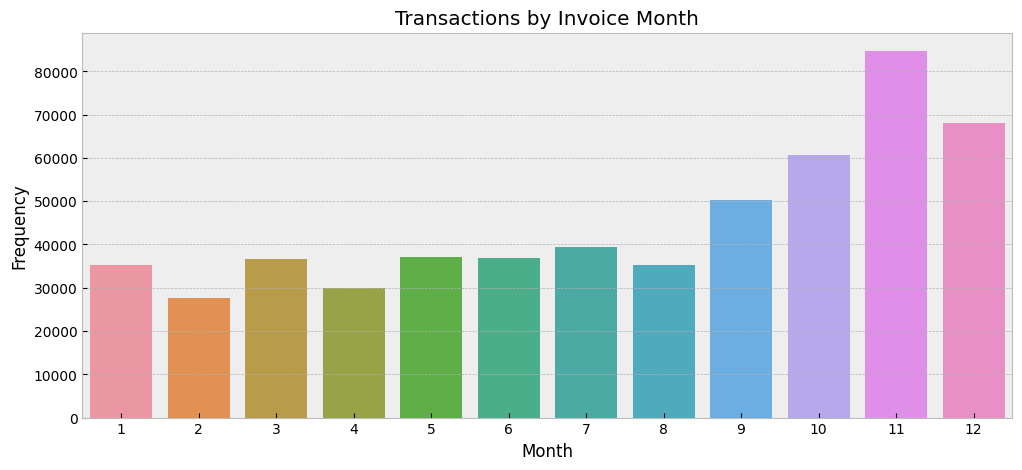

In [22]:
plt.figure(figsize = (12,5))
sns.countplot(x=data['InvoiceMonth'])
plt.title('Transactions by Invoice Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

### 2. The Number Of Orders By Month

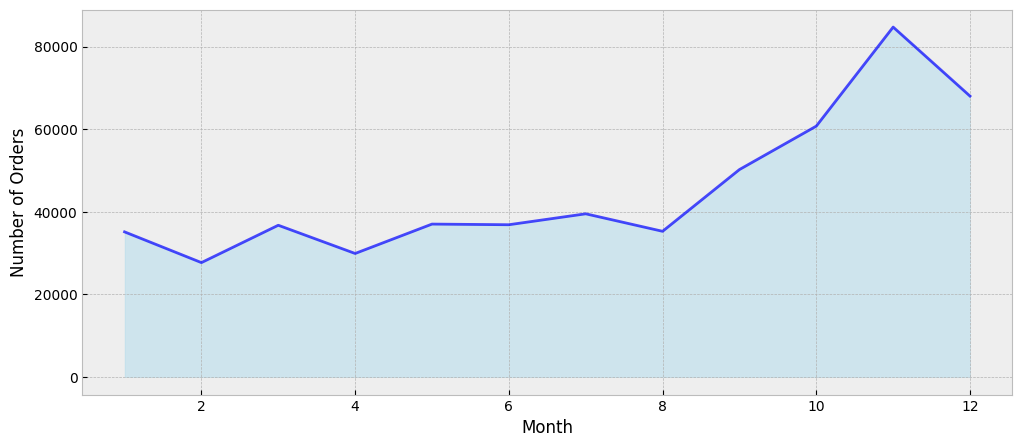

In [23]:
orders_by_month = data.groupby('month_of_date')['InvoiceNo'].count().reset_index()
plt.figure(figsize = (12,5))
plt.fill_between(orders_by_month['month_of_date'], orders_by_month['InvoiceNo'], color='skyblue', alpha=0.3)
plt.plot(orders_by_month['month_of_date'], orders_by_month['InvoiceNo'], color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

### 3. A Pie Chart representing Year Wise Stock

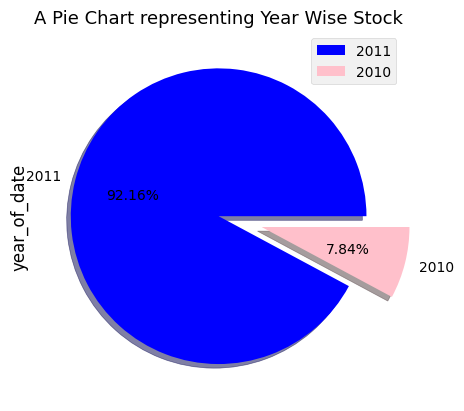

In [24]:
data['year_of_date'].value_counts().plot(kind='pie',colors = ['blue', 'pink'], 
        labels = ['2011', '2010'], 
        shadow = True, 
        explode = [0, 0.3], 
        autopct = '%.2f%%')
plt.title('A Pie Chart representing Year Wise Stock', fontsize = 13, loc = 'left')
plt.legend()
plt.show()

### 4. Number Of Order By Country

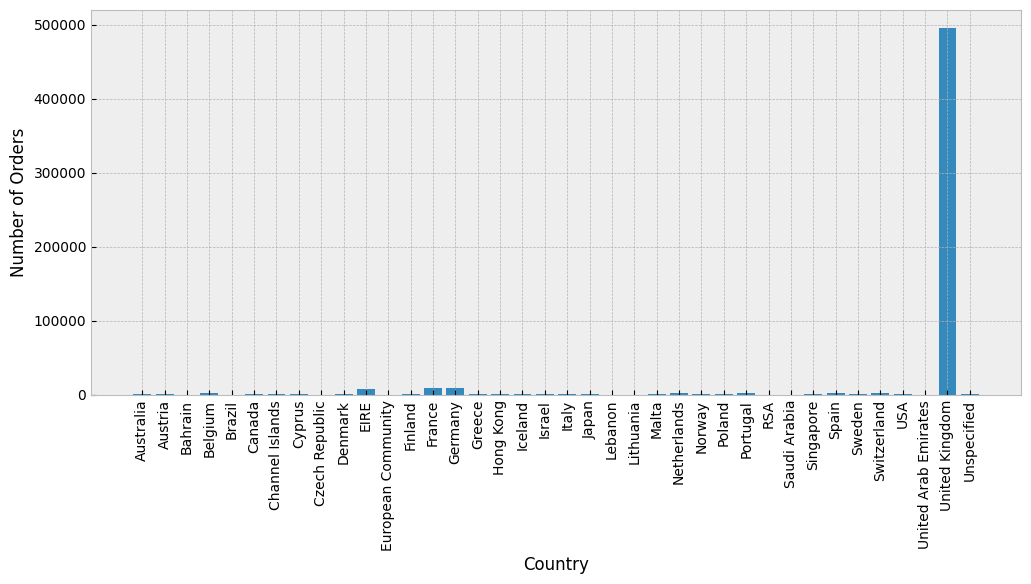

In [25]:
orders_by_country = data.groupby('Country')['InvoiceNo'].count().reset_index()
plt.figure(figsize = (12,5))
plt.bar(orders_by_country['Country'], orders_by_country['InvoiceNo'])
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### 5. Total Revenue by Country

In [26]:
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

In [27]:
NumberOfOrders = data.groupby('StockCode')['InvoiceNo'].nunique().reset_index()
NumberOfOrders.columns = ['CustomerID', 'NumOrders']

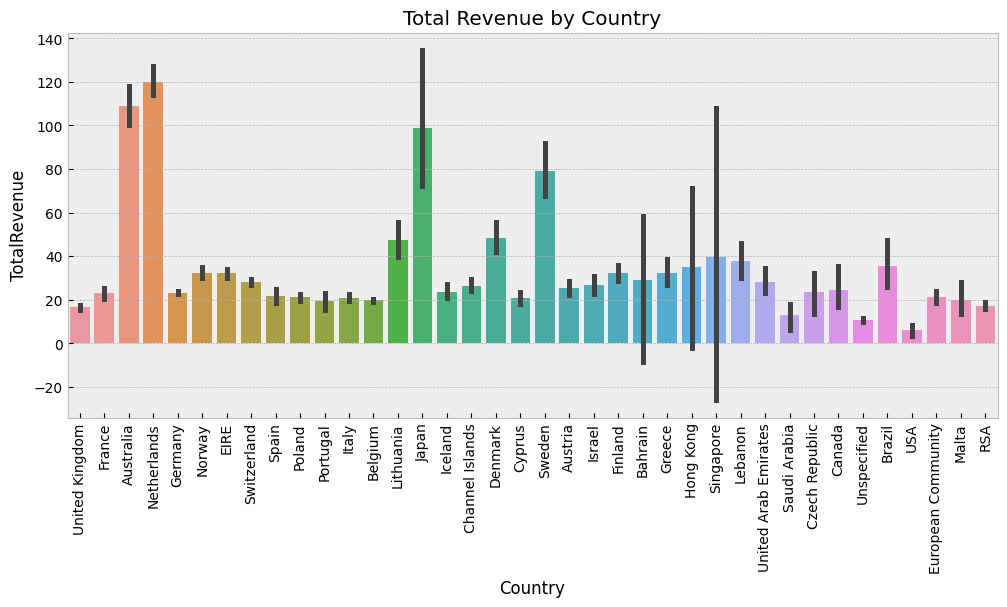

In [28]:
plt.figure(figsize = (12,5))
sns.barplot(data=data, x='Country', y='TotalRevenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)
plt.show()

### 6. Last Invoice Date by Country

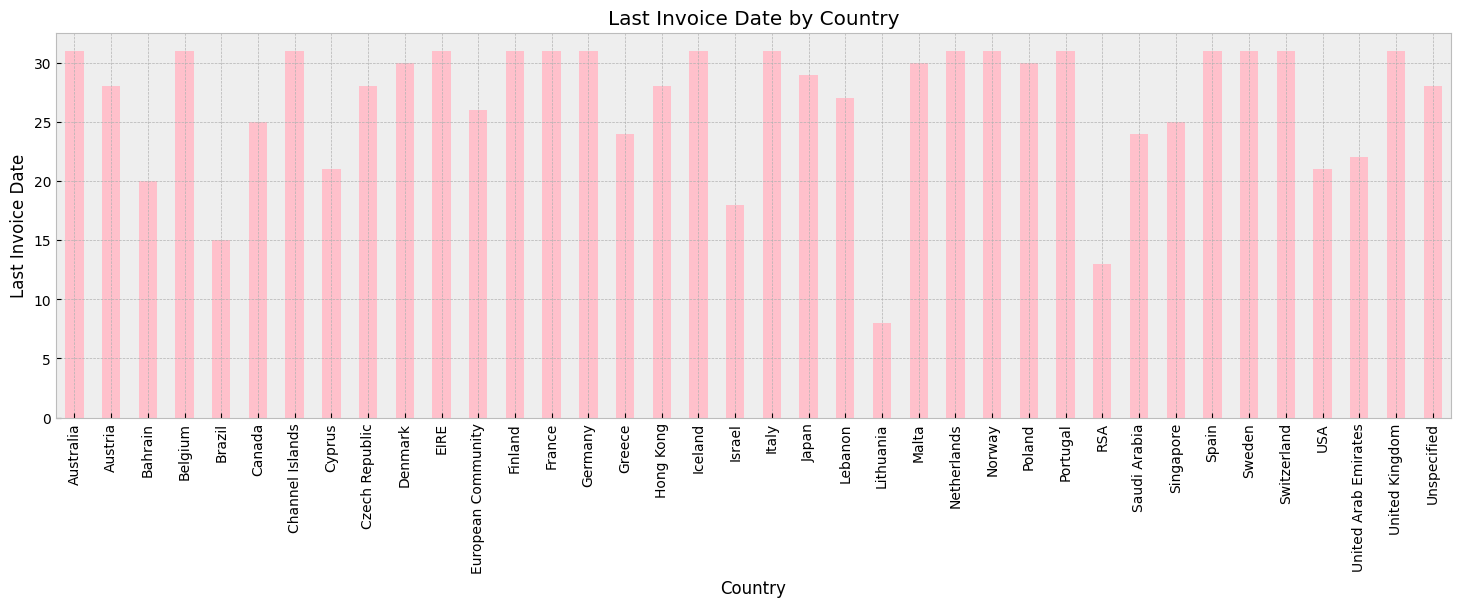

In [29]:
plt.figure(figsize=(18,5))
data.groupby('Country')['day_of_date'].max().plot(kind='bar', color='pink')
plt.title('Last Invoice Date by Country')
plt.xlabel('Country')
plt.ylabel('Last Invoice Date')
plt.show()

### 7. Pair Plot Representing Each Feature and Relation

<Figure size 1800x500 with 0 Axes>

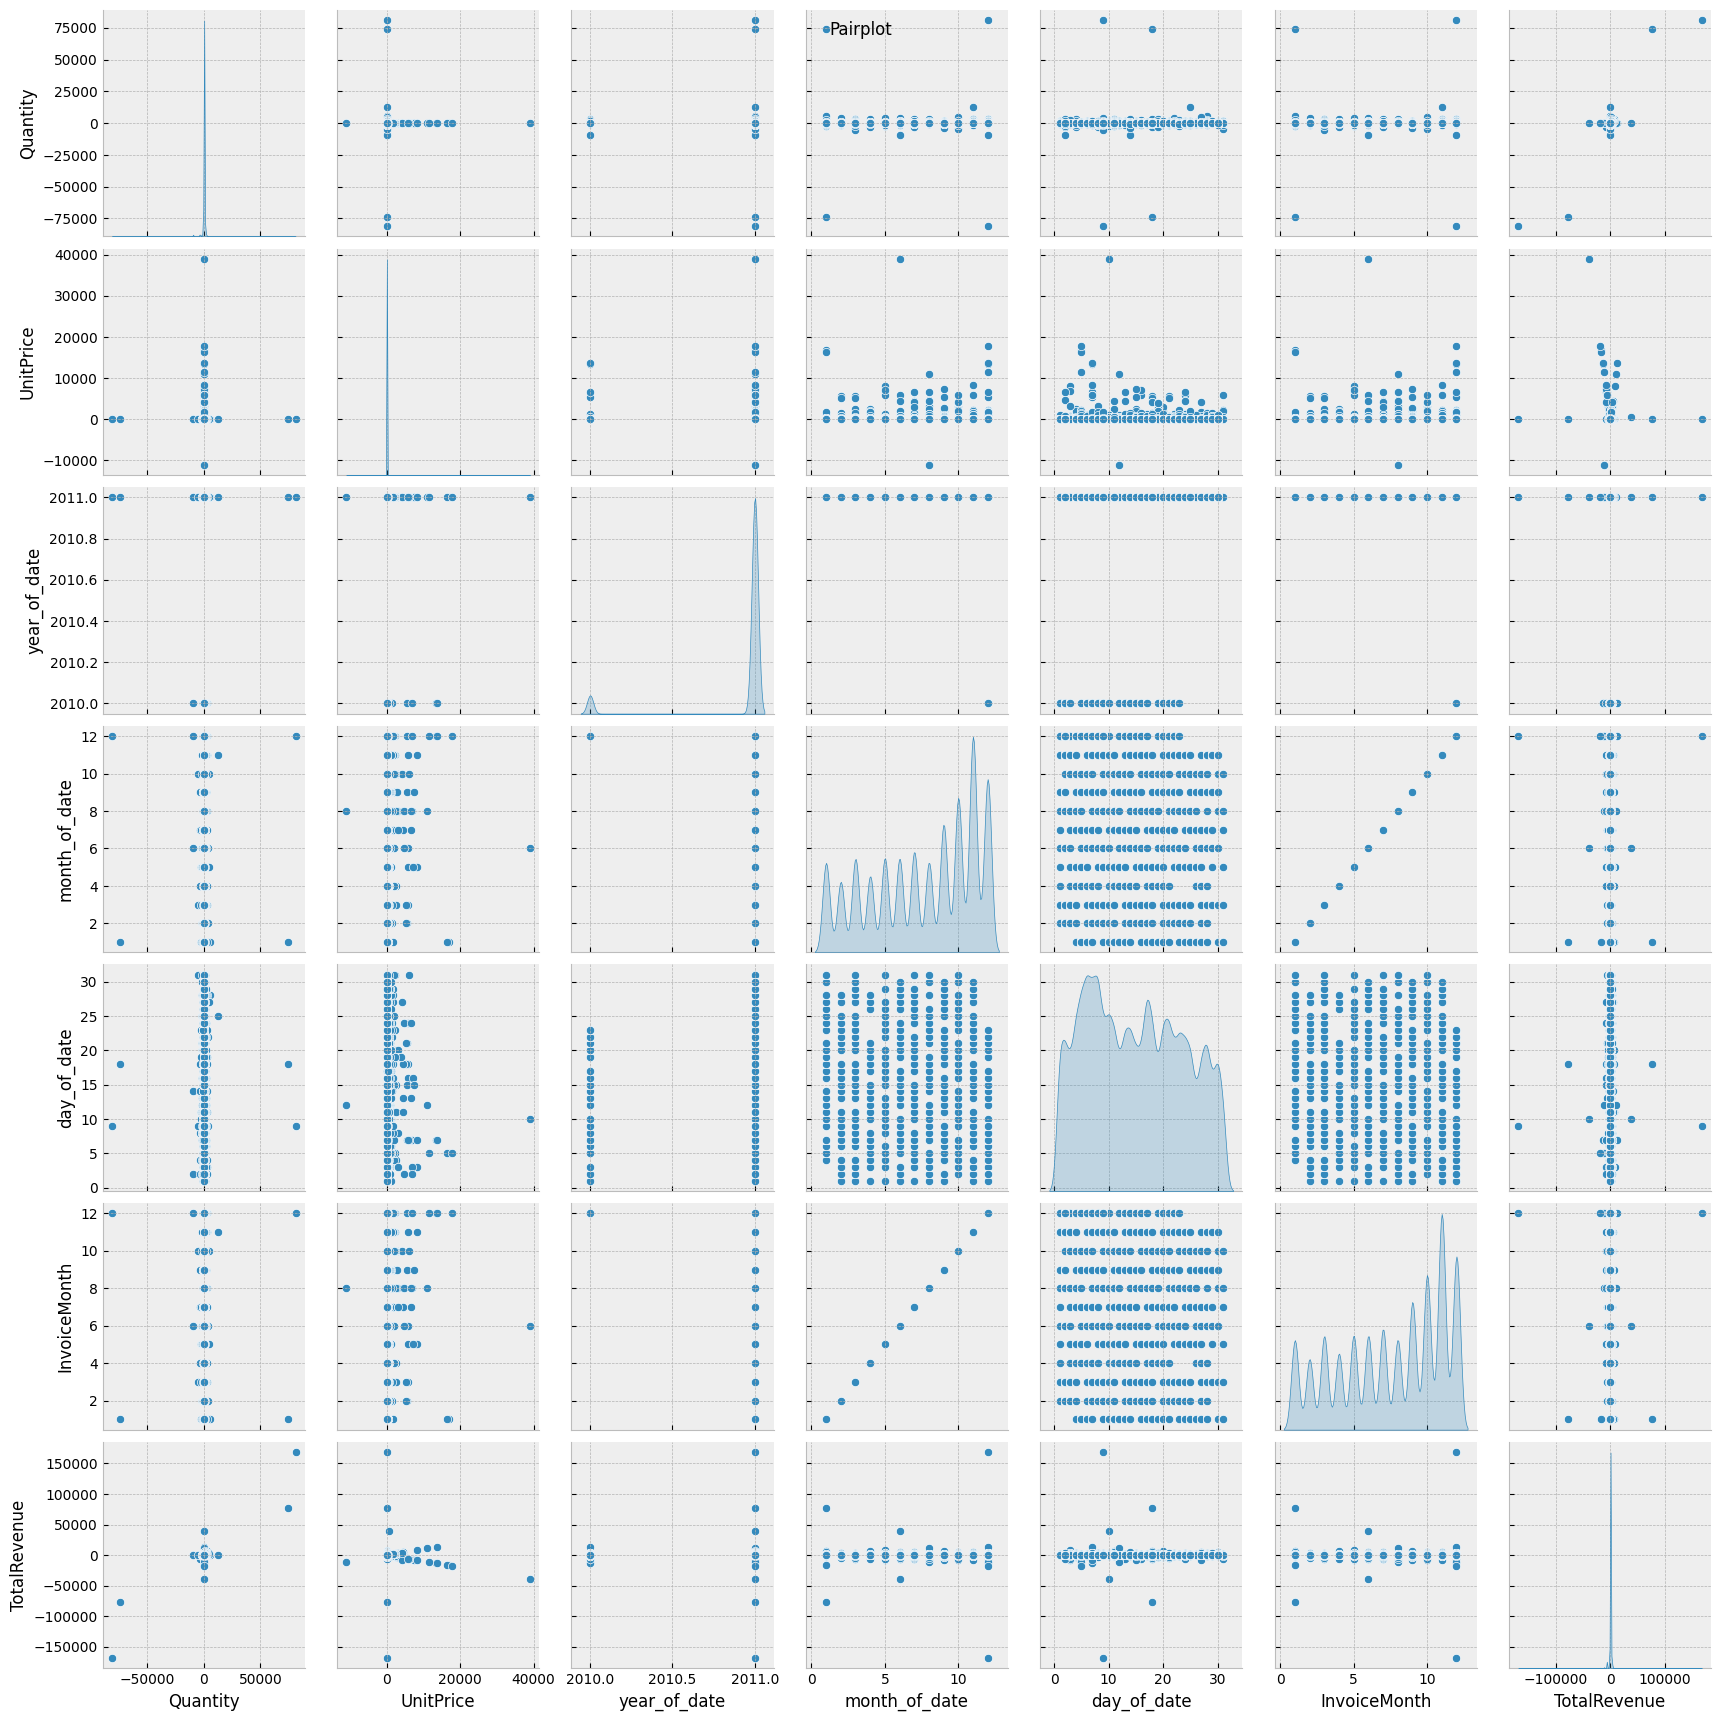

In [30]:
plt.figure(figsize=(18,5))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot')
plt.show()

# Feature Engineering for Model building

## Dropping the irrelevant columns

In [31]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'Invoice_Date', 'Invoice_Time', 'year_of_date',
       'month_of_date', 'day_of_date', 'InvoiceMonth', 'TotalRevenue'],
      dtype='object')

In [32]:
data.sample(3)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Invoice_Date,Invoice_Time,year_of_date,month_of_date,day_of_date,InvoiceMonth,TotalRevenue
34662,539417,21143,12,2010-12-17 13:57:00,1.95,United Kingdom,2010-12-17,13:57:00,2010,12,17,12,23.4
352647,567675,22328,6,2011-09-21 15:54:00,2.95,United Kingdom,2011-09-21,15:54:00,2011,9,21,9,17.7
128361,547253,22774,4,2011-03-22 10:44:00,1.25,United Kingdom,2011-03-22,10:44:00,2011,3,22,3,5.0


In [33]:
data = data.drop(['InvoiceNo','InvoiceDate', 'StockCode','Invoice_Date', 'Invoice_Time'], axis=1)

In [34]:
data.sample(5)

,Quantity,UnitPrice,Country,year_of_date,month_of_date,day_of_date,InvoiceMonth,TotalRevenue
290830,2,2.46,United Kingdom,2011,8,4,8,4.92
427991,1,1.65,United Kingdom,2011,10,30,10,1.65
385337,10,1.65,United Kingdom,2011,10,7,10,16.50
361616,12,2.95,Germany,2011,9,26,9,35.40
188800,2,1.65,United Kingdom,2011,5,13,5,3.30


### Correlation Between Numerical Features Using Heatmap

<AxesSubplot: >

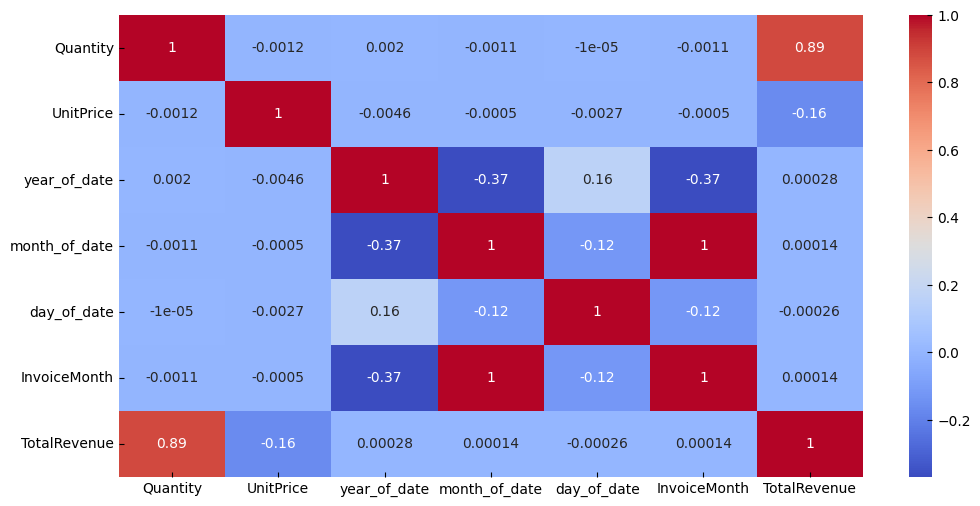

In [35]:
num_cols = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12,6))
sns.heatmap(data[num_cols].corr(),annot=True,cmap='coolwarm')

## Convert Categorical variable into Numerical

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Quantity       541909 non-null  int64  
 1   UnitPrice      541909 non-null  float64
 2   Country        541909 non-null  object 
 3   year_of_date   541909 non-null  int64  
 4   month_of_date  541909 non-null  int64  
 5   day_of_date    541909 non-null  int64  
 6   InvoiceMonth   541909 non-null  int64  
 7   TotalRevenue   541909 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 33.1+ MB


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
LE = LabelEncoder()

In [39]:
data['Country'] = LE.fit_transform(data['Country'])

## Scaling And Transformation

In [40]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [41]:
RS = RobustScaler()

In [42]:
data.columns

Index(['Quantity', 'UnitPrice', 'Country', 'year_of_date', 'month_of_date',
       'day_of_date', 'InvoiceMonth', 'TotalRevenue'],
      dtype='object')

In [43]:
data[['Quantity', 'UnitPrice', 'Country','year_of_date', 'month_of_date', 'day_of_date', 'InvoiceMonth']] = RS.fit_transform(data[['Quantity', 'UnitPrice', 'Country','year_of_date', 'month_of_date', 'day_of_date', 'InvoiceMonth']])

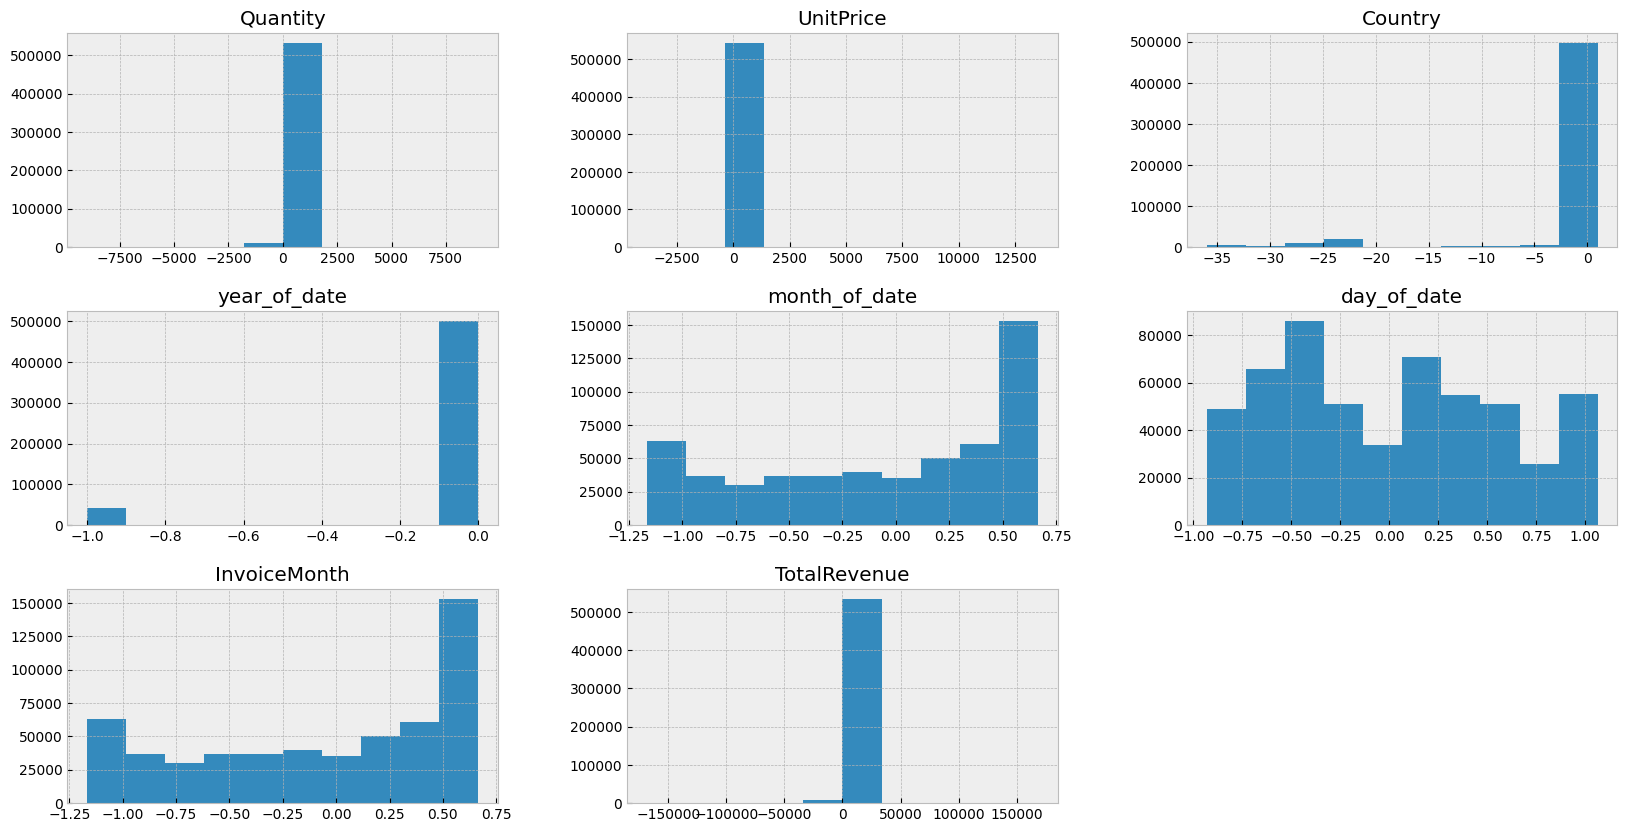

In [44]:
data.hist(figsize=(20,10))
plt.show()

## Taking Sample Of Data

In [45]:
data_1=data.sample(10000)

In [46]:
X=data_1.iloc[:,3:].values

In [47]:
X

array([[ 0.        , -1.        ,  0.46666667, -1.        , 15.        ],
       [-1.        ,  0.66666667, -0.4       ,  0.66666667, 14.43      ],
       [ 0.        ,  0.16666667,  1.        ,  0.16666667,  1.68      ],
       ...,
       [ 0.        ,  0.5       ,  0.        ,  0.5       ,  9.87      ],
       [ 0.        , -0.5       ,  0.13333333, -0.5       , 25.5       ],
       [ 0.        ,  0.5       , -0.4       ,  0.5       , 15.79      ]])

## Model Selection/Predict the groups

### 1. K-means Clustering

In [48]:
from sklearn.cluster import KMeans

In [49]:
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)

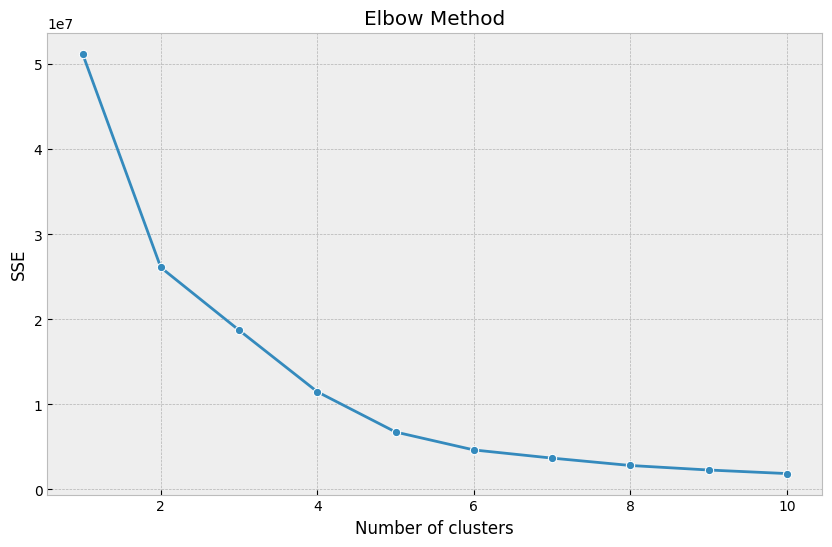

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, 11), y=wsse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

- Point at __cluster=4__ has the largest angle. However, it is better to consider the point 5 and 6 as well to understand which option suits best with business reasoning

In [51]:
# For 4 clusters
kmeans1=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [52]:
pred_1 = kmeans1.fit_predict(X)

In [53]:
pred_1

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
silhouette_score(X,pred_1)

0.9110007301122894

In [56]:
# For 5 clusters
kmeans2=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [57]:
pred_2 = kmeans2.fit_predict(X)

In [58]:
pred_2

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
silhouette_score(X,pred_2)

0.90794276491313

In [60]:
# For 6 clusters
kmeans3=KMeans(n_clusters=6,init='k-means++',random_state=42)

In [61]:
pred_3 = kmeans3.fit_predict(X)

In [62]:
pred_3

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
silhouette_score(X,pred_3)

0.8411117391407915

### 2. Hierarchical Clustering

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
hierarchy = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [66]:
hierarchy.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [67]:
h_pred = hierarchy.fit_predict(X)

In [68]:
silhouette_score(X,h_pred)

0.885451266837546

### 3. DBSCAN

In [69]:
from sklearn.cluster import DBSCAN

In [70]:
dbscan = DBSCAN(eps=0.8, min_samples=6)

In [71]:
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [72]:
db_pred = dbscan.fit_predict(X)

In [73]:
db_score = silhouette_score(X,h_pred)
db_score

0.885451266837546

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Comparison of Accuracy among Different Algorithms

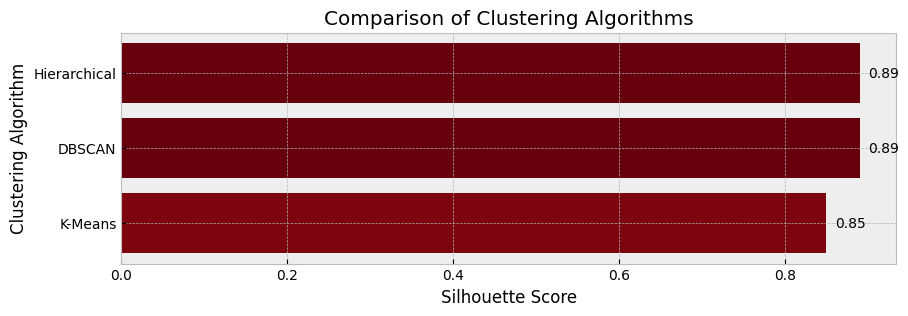

In [76]:
from matplotlib import cm

kmeans_silhouette = 0.85
dbscan_silhouette = 0.89
hierarchical_silhouette = 0.89

scores = [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette]
labels = ['K-Means', 'DBSCAN', 'Hierarchical']
colors = cm.Reds(np.array(scores) / max(scores))

# horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(labels, scores, color=colors)
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Clustering Algorithm')
ax.set_title('Comparison of Clustering Algorithms')

# labels to the bars
for i, score in enumerate(scores):
    ax.text(score + 0.01, i, f'{score:.2f}', ha='left', va='center')
    
plt.show()

# Conclusion

__Based on the analysis and clustering of the customer segmentation data, we can draw the following conclusions:__

- The majority of customers are from the UK, and they contribute the most to the company's revenue.
- The company's most popular products are smaller items, and these items are frequently purchased in large quantities by customers.
- The company has a small number of high-value customers who make frequent and large purchases, which significantly contributes to the company's revenue.
- The K-Means, DBSCAN, and Hierarchical clustering algorithms all perform well on this data, with the highest silhouette score of __0.89__ achieved by both DBSCAN and Hierarchical algorithms, indicating that these two algorithms produce clusters with better internal homogeneity and external separation than K-Means. However, the choice of which algorithm to use ultimately depends on the specific business goals and the characteristics of the data.